In [2]:
import sklearn.neighbors as neighbors
import sklearn.model_selection
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784') 

['9']


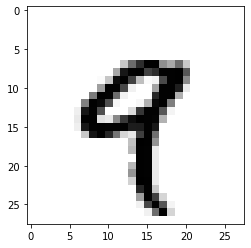

Score de l'échantillon de test : 0.917


In [13]:
data=np.random.randint(70000, size=5000)
trainsize=0.8
nb_neighbors=10
xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(mnist.data[data], mnist.target[data],
train_size=trainsize)
## Entrainement avec k =10
clf = neighbors.KNeighborsClassifier(nb_neighbors)
clf.fit(xtrain,ytrain)
## Affichage de l'image 4 et de la classe prédite (9)
print(clf.predict([mnist.data[4]]))
images = mnist.data.reshape((-1, 28, 28)) 
plt.imshow(images[4],cmap=plt.cm.gray_r,interpolation="nearest") 
plt.show() 
## Affichage du score de l'échantillon de test
print("Score de l'échantillon de test : "+str(clf.score(xtest,ytest)))


Redo n°0 : 
With k=2 -> score=0.932
With k=3 -> score=0.941
With k=4 -> score=0.942
With k=5 -> score=0.942
With k=6 -> score=0.942
With k=7 -> score=0.935
With k=8 -> score=0.94
With k=9 -> score=0.932
With k=10 -> score=0.93
With k=11 -> score=0.929
With k=12 -> score=0.927
With k=13 -> score=0.924
With k=14 -> score=0.927
With k=15 -> score=0.926
Redo n°1 : 
With k=2 -> score=0.916
With k=3 -> score=0.925
With k=4 -> score=0.924
With k=5 -> score=0.928
With k=6 -> score=0.924
With k=7 -> score=0.922
With k=8 -> score=0.927
With k=9 -> score=0.922
With k=10 -> score=0.919
With k=11 -> score=0.914
With k=12 -> score=0.917
With k=13 -> score=0.917
With k=14 -> score=0.917
With k=15 -> score=0.914
Redo n°2 : 
With k=2 -> score=0.923
With k=3 -> score=0.938
With k=4 -> score=0.928
With k=5 -> score=0.93
With k=6 -> score=0.929
With k=7 -> score=0.932
With k=8 -> score=0.931
With k=9 -> score=0.928
With k=10 -> score=0.93
With k=11 -> score=0.932
With k=12 -> score=0.929
With k=13 -> scor

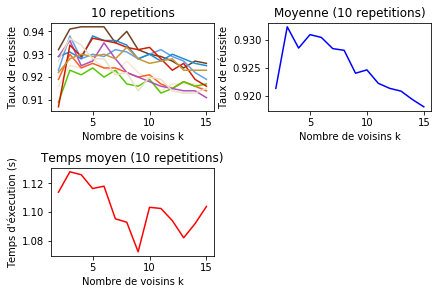

In [59]:
### varier le nombre de voisins 
nb_redo=10
score=[]
timevect=[0]*len(range(2,16))
plt.subplot(2, 2, 1)
for a in range(0,nb_redo):
    tempscore=[]
    data=np.random.randint(70000, size=5000)
    trainsize=0.8
    xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(mnist.data[data], mnist.target[data],
    train_size=trainsize)
    print("Redo n°"+str(a)+" : ")
    for k in range(2,16):
        start=time.time()
        clf = neighbors.KNeighborsClassifier(k,n_jobs=-1)
        clf.fit(xtrain,ytrain)
        kscore=clf.score(xtest, ytest)
        print("With k="+str(k)+" -> score="+str(kscore))
        tempscore.append(kscore)
        stop=time.time()
        exectime=stop-start
        timevect[k-2]=timevect[k-2]+exectime
    score.append(tempscore)
    plt.plot(range(2,16),tempscore,c=np.random.rand(3,))
plt.title(str(nb_redo)+" repetitions")
plt.xlabel("Nombre de voisins k")
plt.ylabel("Taux de réussite")
plt.subplot(2, 2, 2)
meanscore=[0]*len(range(2,16))
for i in range(len(score)):
    for j in range(len(score[0])):
        meanscore[j]+=score[i][j]
meanscore = [x / nb_redo for x in meanscore]
timevect= [x / nb_redo for x in timevect]
plt.plot(range(2,16),meanscore,c='b')
plt.title("Moyenne ("+str(nb_redo)+" repetitions)")
plt.xlabel("Nombre de voisins k")
plt.ylabel("Taux de réussite")
plt.subplot(2, 2, 3)
plt.plot(range(2,16),timevect,c='r')
plt.title("Temps moyen ("+str(nb_redo)+" repetitions)")
plt.xlabel("Nombre de voisins k")
plt.ylabel("Temps d'éxecution (s)")
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

Redo n°0 : 
With 10% training data -> score=0.7857777777777778
With 15% training data -> score=0.8329411764705882
With 20% training data -> score=0.8425
With 25% training data -> score=0.8642666666666666
With 30% training data -> score=0.8785714285714286
With 35% training data -> score=0.888
With 40% training data -> score=0.882
With 45% training data -> score=0.8945454545454545
With 50% training data -> score=0.8992
With 55% training data -> score=0.8995555555555556
With 60% training data -> score=0.903
With 65% training data -> score=0.9108571428571428
With 70% training data -> score=0.9153333333333333
With 75% training data -> score=0.908
With 80% training data -> score=0.915
With 85% training data -> score=0.9186666666666666
With 90% training data -> score=0.936
With 95% training data -> score=0.92
Redo n°1 : 
With 10% training data -> score=0.8115555555555556
With 15% training data -> score=0.8341176470588235
With 20% training data -> score=0.8705
With 25% training data -> score=0

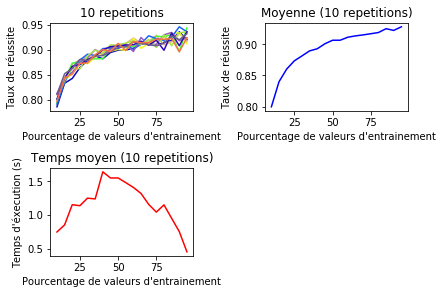

In [60]:
### varier le pourcentage de test/entrainement dans les échantillons 
nb_redo=10
score=[]
timevect=[0]*len(range(10,100,5))
plt.subplot(2, 2, 1)
for a in range(0,nb_redo):
    tempscore=[]
    data=np.random.randint(70000, size=5000)
    print("Redo n°"+str(a)+" : ")
    for i in range(10,100,5):
        start=time.time()
        xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(mnist.data[data], mnist.target[data],
        train_size=i/100)
        clf = neighbors.KNeighborsClassifier(10,n_jobs=-1)
        clf.fit(xtrain,ytrain)
        percentscore=clf.score(xtest, ytest)
        print("With "+str(i)+"% training data -> score="+str(percentscore))
        tempscore.append(percentscore)
        stop=time.time()
        exectime=stop-start
        index=int((i-10)/5)
        timevect[index]=timevect[index]+exectime
    score.append(tempscore)
    plt.plot(range(10,100,5),tempscore,c=np.random.rand(3,))
plt.title(str(nb_redo)+" repetitions")
plt.xlabel("Pourcentage de valeurs d'entrainement")
plt.ylabel("Taux de réussite")
plt.subplot(2, 2, 2)
meanscore=[0]*len(range(10,100,5))
for i in range(len(score)):
    for j in range(len(score[0])):
        meanscore[j]+=score[i][j]
meanscore = [x / nb_redo for x in meanscore]
timevect= [x / nb_redo for x in timevect]
plt.plot(range(10,100,5),meanscore,c='b')
plt.title("Moyenne ("+str(nb_redo)+" repetitions)")
plt.xlabel("Pourcentage de valeurs d'entrainement")
plt.ylabel("Taux de réussite")
plt.subplot(2, 2, 3)
plt.plot(range(10,100,5),timevect,c='r')
plt.title("Temps moyen ("+str(nb_redo)+" repetitions)")
plt.xlabel("Pourcentage de valeurs d'entrainement")
plt.ylabel("Temps d'éxecution (s)")
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

Redo n°0 : 
With 500 data -> score=0.84
With 1000 data -> score=0.83
With 1500 data -> score=0.89
With 2000 data -> score=0.8525
With 2500 data -> score=0.876
With 3000 data -> score=0.905
With 3500 data -> score=0.9214285714285714
With 4000 data -> score=0.9275
With 4500 data -> score=0.9233333333333333
With 5000 data -> score=0.919
With 5500 data -> score=0.9281818181818182
With 6000 data -> score=0.935
With 6500 data -> score=0.9392307692307692
With 7000 data -> score=0.9185714285714286
With 7500 data -> score=0.9346666666666666
With 8000 data -> score=0.93
With 8500 data -> score=0.9364705882352942
With 9000 data -> score=0.9422222222222222
With 9500 data -> score=0.9231578947368421
With 10000 data -> score=0.9405
With 10500 data -> score=0.9357142857142857
With 11000 data -> score=0.9404545454545454
With 11500 data -> score=0.948695652173913
With 12000 data -> score=0.9408333333333333
With 12500 data -> score=0.948
With 13000 data -> score=0.9365384615384615
With 13500 data -> sco

With 6500 data -> score=0.9361538461538461
With 7000 data -> score=0.9242857142857143
With 7500 data -> score=0.9273333333333333
With 8000 data -> score=0.935
With 8500 data -> score=0.9223529411764706
With 9000 data -> score=0.9311111111111111
With 9500 data -> score=0.9321052631578948
With 10000 data -> score=0.9405
With 10500 data -> score=0.9357142857142857
With 11000 data -> score=0.9340909090909091
With 11500 data -> score=0.9434782608695652
With 12000 data -> score=0.9441666666666667
With 12500 data -> score=0.9412
With 13000 data -> score=0.9403846153846154
With 13500 data -> score=0.9422222222222222
With 14000 data -> score=0.9321428571428572
With 14500 data -> score=0.9393103448275862
Redo n°8 : 
With 500 data -> score=0.75
With 1000 data -> score=0.825
With 1500 data -> score=0.83
With 2000 data -> score=0.9
With 2500 data -> score=0.934
With 3000 data -> score=0.8983333333333333
With 3500 data -> score=0.9142857142857143
With 4000 data -> score=0.92
With 4500 data -> score=

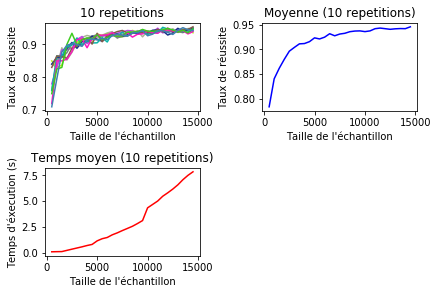

In [61]:
### varier la taille de l’échantillon                                           
nb_redo=10
score=[]
timevect=[0]*len(range(500,15000,500))
plt.subplot(2, 2, 1)
for a in range(0,nb_redo):
    tempscore=[]
    print("Redo n°"+str(a)+" : ")
    for size in range(500,15000,500):
        start=time.time()
        data=np.random.randint(70000, size=size)
        xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(mnist.data[data], mnist.target[data],
        train_size=0.8)
        clf = neighbors.KNeighborsClassifier(10,n_jobs=-1)
        clf.fit(xtrain,ytrain)
        sizescore=clf.score(xtest, ytest)
        print("With "+str(size)+" data -> score="+str(sizescore))
        tempscore.append(sizescore)
        stop=time.time()
        exectime=stop-start
        index=int((size-500)/500)
        timevect[index]=timevect[index]+exectime
    score.append(tempscore)
    plt.plot(range(500,15000,500),tempscore,c=np.random.rand(3,))
plt.title(str(nb_redo)+" repetitions")
plt.xlabel("Taille de l'échantillon")
plt.ylabel("Taux de réussite")
plt.subplot(2, 2, 2)
meanscore=[0]*len(range(500,15000,500))
for i in range(len(score)):
    for j in range(len(score[0])):
        meanscore[j]+=score[i][j]
meanscore = [x / nb_redo for x in meanscore]
timevect= [x / nb_redo for x in timevect]
plt.plot(range(500,15000,500),meanscore,c='b')
plt.title("Moyenne ("+str(nb_redo)+" repetitions)")
plt.xlabel("Taille de l'échantillon")
plt.ylabel("Taux de réussite")
plt.subplot(2, 2, 3)
plt.plot(range(500,15000,500),timevect,c='r')
plt.title("Temps moyen ("+str(nb_redo)+" repetitions)")
plt.xlabel("Taille de l'échantillon")
plt.ylabel("Temps d'éxecution (s)")
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()
    


Redo n°0 : 
With 2 neighbors p=1 -> score=0.896
With 3 neighbors p=1 -> score=0.915
With 4 neighbors p=1 -> score=0.902
With 5 neighbors p=1 -> score=0.91
With 6 neighbors p=1 -> score=0.902
With 7 neighbors p=1 -> score=0.901
With 8 neighbors p=1 -> score=0.897
With 9 neighbors p=1 -> score=0.897
With 10 neighbors p=1 -> score=0.889
With 11 neighbors p=1 -> score=0.884
With 12 neighbors p=1 -> score=0.886
With 13 neighbors p=1 -> score=0.885
With 14 neighbors p=1 -> score=0.88
With 15 neighbors p=1 -> score=0.88
With 2 neighbors p=2 -> score=0.908
With 3 neighbors p=2 -> score=0.922
With 4 neighbors p=2 -> score=0.918
With 5 neighbors p=2 -> score=0.918
With 6 neighbors p=2 -> score=0.919
With 7 neighbors p=2 -> score=0.915
With 8 neighbors p=2 -> score=0.907
With 9 neighbors p=2 -> score=0.91
With 10 neighbors p=2 -> score=0.906
With 11 neighbors p=2 -> score=0.906
With 12 neighbors p=2 -> score=0.903
With 13 neighbors p=2 -> score=0.899
With 14 neighbors p=2 -> score=0.9
With 15 nei

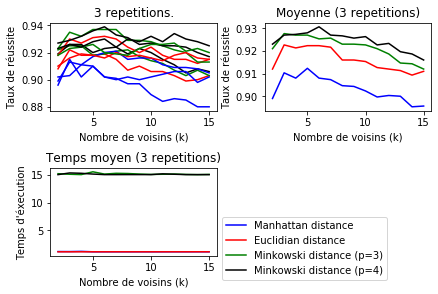

In [4]:
### varier types de distance                            
nb_redo=3
scorep1=[]
scorep2=[]
scorep3=[]
scorep4=[]
timevect = [0] *4
for i in range(4):
    timevect[i] = [0] * len(range(2,16))
plt.subplot(2, 2, 1)
for a in range(0,nb_redo):
    print("Redo n°"+str(a)+" : ")
    data=np.random.randint(70000, size=5000)
    xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(mnist.data[data], mnist.target[data],
    train_size=0.8)
    tempscore=[]
    for k in range(2,16):
        start=time.time()
        clf = neighbors.KNeighborsClassifier(k,p=1,n_jobs=-1)
        clf.fit(xtrain,ytrain)
        distancescore=clf.score(xtest, ytest)
        tempscore.append(distancescore)
        print("With "+str(k)+" neighbors p=1 -> score="+str(distancescore))
        stop=time.time()
        exectime=stop-start
        timevect[0][k-2]=timevect[0][k-2]+exectime
    scorep1.append(tempscore)
    plt.plot(range(2,16),tempscore,c='b')
    tempscore=[]
    for k in range(2,16):
        start=time.time()
        clf = neighbors.KNeighborsClassifier(k,p=2,n_jobs=-1)
        clf.fit(xtrain,ytrain)
        distancescore=clf.score(xtest, ytest)
        tempscore.append(distancescore)
        print("With "+str(k)+" neighbors p=2 -> score="+str(distancescore))
        stop=time.time()
        exectime=stop-start
        timevect[1][k-2]=timevect[1][k-2]+exectime
    scorep2.append(tempscore)
    plt.plot(range(2,16),tempscore,c='r')
    tempscore=[]
    for k in range(2,16):
        start=time.time()
        clf = neighbors.KNeighborsClassifier(k,p=3,n_jobs=-1)
        clf.fit(xtrain,ytrain)
        distancescore=clf.score(xtest, ytest)
        tempscore.append(distancescore)
        print("With "+str(k)+" neighbors p=3 -> score="+str(distancescore))
        stop=time.time()
        exectime=stop-start
        timevect[2][k-2]=timevect[2][k-2]+exectime
    scorep3.append(tempscore)
    plt.plot(range(2,16),tempscore,c='g')
    tempscore=[]
    for k in range(2,16):
        start=time.time()
        clf = neighbors.KNeighborsClassifier(k,p=4,n_jobs=-1)
        clf.fit(xtrain,ytrain)
        distancescore=clf.score(xtest, ytest)
        tempscore.append(distancescore)
        print("With "+str(k)+" neighbors p=4 -> score="+str(distancescore))
        stop=time.time()
        exectime=stop-start
        timevect[3][k-2]=timevect[3][k-2]+exectime
    scorep4.append(tempscore)
    plt.plot(range(2,16),tempscore,c='k')
plt.title(str(nb_redo)+" repetitions.")
plt.xlabel("Nombre de voisins (k)")
plt.ylabel("Taux de réussite")
meanscorep1=[0]*len(range(2,16))
meanscorep2=[0]*len(range(2,16))
meanscorep3=[0]*len(range(2,16))
meanscorep4=[0]*len(range(2,16))
plt.subplot(2, 2, 2)
for i in range(len(scorep1)):
    for j in range(len(scorep1[0])):
        meanscorep1[j]+=scorep1[i][j]
        meanscorep2[j]+=scorep2[i][j]
        meanscorep3[j]+=scorep3[i][j]
        meanscorep4[j]+=scorep4[i][j]
meanscorep1 = [x / nb_redo for x in meanscorep1]
meanscorep2 = [x / nb_redo for x in meanscorep2]
meanscorep3 = [x / nb_redo for x in meanscorep3]
meanscorep4 = [x / nb_redo for x in meanscorep4]
for a in range(4):
    timevect[a] = [x / nb_redo for x in timevect[a]]
plt.plot(range(2,16),meanscorep1,c='b',label="Manhattan distance")
plt.plot(range(2,16),meanscorep2,c='r',label="Euclidian distance")
plt.plot(range(2,16),meanscorep3,c='g',label="Minkowski distance (p=3)")
plt.plot(range(2,16),meanscorep4,c='k',label="Minkowski distance (p=4)")
plt.title("Moyenne ("+str(nb_redo)+" repetitions)")
plt.xlabel("Nombre de voisins (k)")
plt.ylabel("Taux de réussite")
plt.subplot(2, 2, 3)
plt.plot(range(2,16),timevect[0],c='b',label="Manhattan distance")
plt.plot(range(2,16),timevect[1],c='r',label="Euclidian distance")
plt.plot(range(2,16),timevect[2],c='g',label="Minkowski distance (p=3)")
plt.plot(range(2,16),timevect[3],c='k',label="Minkowski distance (p=4)")
plt.title("Temps moyen ("+str(nb_redo)+" repetitions)")
plt.xlabel("Nombre de voisins (k)")
plt.ylabel("Temps d'éxecution")
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.legend(loc = 'upper left',bbox_to_anchor=(1, 0.5))
plt.show()

In [20]:
### Faire varier les n_jobs
random=np.random.randint(70000, size=5000)
trainsize=0.8
n_neighbors=10
xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(mnist.data[random], mnist.target[random],
train_size=trainsize)

In [21]:
%%time              # Affichage du temps d'éxecution de la cellule à la fin de l'éxecution
for i in range(2,16):
    clf = neighbors.KNeighborsClassifier(i,n_jobs=1)
    clf.fit(xtrain,ytrain)
    print("With 1 job"+" N="+str(i)+" --> "+str(clf.score(xtest, ytest)))

With 1 job N=2 --> 0.901
With 1 job N=3 --> 0.912
With 1 job N=4 --> 0.912
With 1 job N=5 --> 0.914
With 1 job N=6 --> 0.915
With 1 job N=7 --> 0.915
With 1 job N=8 --> 0.905
With 1 job N=9 --> 0.91
With 1 job N=10 --> 0.911
With 1 job N=11 --> 0.908
With 1 job N=12 --> 0.908
With 1 job N=13 --> 0.905
With 1 job N=14 --> 0.905
With 1 job N=15 --> 0.9
Wall time: 1min 10s


In [22]:
%%time              # Affichage du temps d'éxecution de la cellule à la fin de l'éxecution
for i in range(2,16):
    clf = neighbors.KNeighborsClassifier(i,n_jobs=-1)
    clf.fit(xtrain,ytrain)
    print("With Max Jobs"+" N="+str(i)+" --> "+str(clf.score(xtest, ytest)))

With Max Jobs N=2 --> 0.901
With Max Jobs N=3 --> 0.912
With Max Jobs N=4 --> 0.912
With Max Jobs N=5 --> 0.914
With Max Jobs N=6 --> 0.915
With Max Jobs N=7 --> 0.915
With Max Jobs N=8 --> 0.905
With Max Jobs N=9 --> 0.91
With Max Jobs N=10 --> 0.911
With Max Jobs N=11 --> 0.908
With Max Jobs N=12 --> 0.908
With Max Jobs N=13 --> 0.905
With Max Jobs N=14 --> 0.905
With Max Jobs N=15 --> 0.9
Wall time: 26.5 s


In [3]:
# Affichage d'une confusion_matrix
data=np.random.randint(70000, size=5000)
trainsize=0.8
nb_neighbors=10
xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(mnist.data[data], mnist.target[data],
train_size=trainsize)
## Entrainement avec k =10
clf = neighbors.KNeighborsClassifier(nb_neighbors)
clf.fit(xtrain,ytrain)
confusion_matrix(ytest,clf.predict(xtest))

array([[102,   0,   0,   0,   0,   2,   1,   0,   0,   0],
       [  0, 121,   0,   0,   1,   0,   0,   0,   0,   0],
       [  3,   4,  82,   0,   0,   0,   1,   2,   0,   1],
       [  0,   0,   2,  72,   0,   4,   0,   0,   1,   0],
       [  1,   5,   0,   0,  80,   0,   2,   0,   0,   5],
       [  1,   2,   0,   1,   2,  78,   0,   0,   1,   2],
       [  0,   0,   0,   0,   0,   0,  90,   0,   0,   0],
       [  0,   7,   0,   0,   0,   0,   0,  94,   0,   2],
       [  1,   4,   0,   4,   1,   7,   2,   1,  88,   1],
       [  2,   1,   0,   3,  12,   0,   0,   2,   0,  99]])